**Case Study:**

        Text Analysis is an important application of machine learning algorithms. 
        Since the raw text or a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with proper dimensions rather than the raw text documents which is an example of unstructured data. 
        
        For Classification you will be using Machine Learning Algorithms such as Logistic Regression. 
        You will also be using some NLP techniques such as count Vectorizer and Term Frequency-Inverse document Matrix (TF-IDF)

[Data Set](http://jmcauley.ucsd.edu/data/amazon/)

**Some steps mentioned below:**

* Data Preparation, In this section you will prepare our data from simple text and ratings to a matrix that is acceptable by Ma chine Learning Algorithms.
* Applying NLP techniques to extract features out of text such as Tokenization and TF-IDF you will be using scikit learn.
* Building a Classification Model.
* Evaluating Model
* Finally Predicting a new review that even you can write by yourself (but beware the words you use in your review should be there in training set, else you will get an Error!).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB,ComplementNB,CategoricalNB,MultinomialNB

In [2]:
df = pd.read_csv('Amazon_reviews.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
1,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
2,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
3,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
4,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


To avoid errors in further steps like the modeling part it is better to drop rows which have missing values.

In [3]:
df.dropna(inplace=True)

Now, the question is how you can define a review to be a positive one or a negative, so for this you are creating a binary variable "Positively_Rated" in which 1 signifies a review is Positively rated and 0 means Negative rated, adding it to our dataset. A simple rule to mark a positive and negative rating can be obtained by selecting rating > 3 as **1 (positively rated)** and others as **0 (Negatively rated)** removing neutral ratings which is equal to 3.

In [4]:
df = df[df['Rating']!=3]
df['Positively_Rated'] = np.where(df['Rating']>3,1,0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively_Rated
1,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
2,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
3,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
4,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
5,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1


#### **Class Proportion**

* Using simple Pandas Crosstab function you can have a look of what proportion of observations are positively and negatively rated. 
* This step helps a lot while during the modeling part since it is important to know **class imbalance** before you start building model. 
* **Class imbalance** affects your model, if you have quite less amount of observations for a certain class over other classes, which at the end becomes difficult for an algorithm to learn and differentiate among other classes due to lack of examples.

In [5]:
pd.crosstab(index= df['Positively_Rated'],columns='Total Count')

col_0,Total Count
Positively_Rated,
0,7771
1,22966


We got Immbalance lables in 0 is 7771 and 1 is 22966 which is Not Equal due to this we got Immbalanceing data to handle in sklearn we have different method **`sklearn.model_selection.StratifiedShuffleSplit()`**

In [6]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively_Rated
1,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
2,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
3,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
4,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
5,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1


In [21]:
Features = df['Reviews']
Target = df['Positively_Rated']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(Features,Target,random_state=0)

In [23]:
print("Feature Training Size is:",X_train.shape)
print("Feature Testing Size is:",X_test.shape)

Feature Training Size is: (23052,)
Feature Testing Size is: (7685,)


In [24]:
print("Target Training Size is:",y_train.shape)
print("Target Testing Size is:",y_test.shape)

Target Training Size is: (23052,)
Target Testing Size is: (7685,)


In [25]:
X_train

25808                      Everything about it is awesome!
12625    I bought this phone in July of 2015, and I lov...
422      Small and very light, simple, when just a phon...
35138                                        Awesome phone
12831    The phone is just as described. Looks sleek an...
                               ...                        
17602    I am having the hardest time getting a SIM car...
26357                                            NUEVECITO
13196    I am a very satisfied customer and would highl...
14463    First of all there are few choices in sub 5" A...
3665     Within 2weeks of owning the phone it shown a u...
Name: Reviews, Length: 23052, dtype: object

**Tokenization**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vect = CountVectorizer().fit(X_train)
# Array mapping from feature integer indices to feature name
vect.get_feature_names()[::2000]

['00',
 'arroja',
 'comapañias',
 'dvds',
 'golden',
 'lands',
 'oil',
 'razonable',
 'smallsliver',
 'tweak']

In [28]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print('Shape of matrix', X_train_vectorized.shape)

Shape of matrix (23052, 19601)


In [29]:
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
# Train the model
model = LogisticRegression()

model.fit(X_train_vectorized, y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.8972615386663231


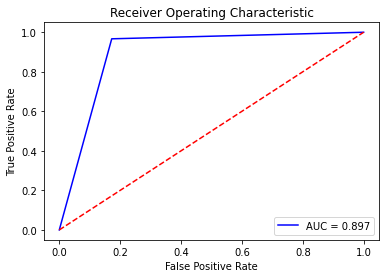

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5; 
# you can play with it and see how accuracy changes 
vect_tf = TfidfVectorizer(min_df=5).fit(X_train)

In [34]:
X_train_vectorized_tf = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized_tf, y_train)
predictions_tf = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions_tf))

AUC:  0.8972615386663231


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print(model.predict(vect.transform([
                                    'Not an issue with my phone is working',
                                    "an issue, now touch is not working",
                                   "phone is working",
                                    "My perfomace of mobile is good but with touch i have issue"
])))

[0 0 1 1]


In [39]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [40]:

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9104640361714084


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


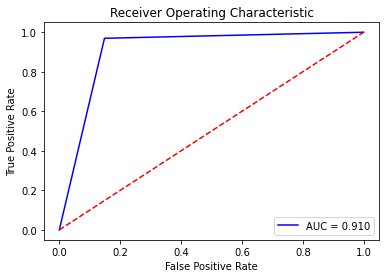

In [41]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [42]:
print(model.predict(vect.transform([
                                    'Not an issue with my phone is working',
                                    "an issue, now touch is not working",
                                   "phone is working",
                                    "My perfomace of mobile is good but with touch i have issue"
])))

[1 0 1 1]


In [48]:
print(model.predict(vect.transform(["when i click selfie it's Good",
                                    "I Click on selfie Some what not ok"])))

[1 1]
